In [1]:
library(Seurat)
library(SeuratWrappers)
library(ggplot2)
library(scales)
library(STACAS)
library(grid)
library(gridExtra)
library(reshape2)
library(lisi)
library(BuenColors)
library(stringr)

Attaching SeuratObject

Loading required package: MASS



In [3]:
tmp<-readRDS("ribas_final/inferCNV_cellbender_subcluster_ribas_310_on_GEX_5pv2_S27_L004_titrate_thresh")

Warning message in gzfile(file, "rb"):
“cannot open file 'ribas_final/inferCNV_cellbender_subcluster_ribas_310_on_GEX_5pv2_S27_L004_titrate_thresh': it is a directory”


ERROR: Error in gzfile(file, "rb"): cannot open the connection


In [2]:
annot=read.csv("natgen_annots/bi005_reorder.csv")

In [6]:
for (i in 1: 21094) {
tmp<-str_split(scvi_cells[["X"]][1],pattern="-")[[1]][1]
tmp2<-str_split(annot[["X"]][1],pattern="-")[[1]][1]
#print(i)
if (tmp!=tmp2){
    print(tmp2)
}
}

In [3]:
scvi_cells <- read.csv("ribas/bi005/bi005_orig.ident.csv")
scvi_dense <- read.csv("ribas/bi005/bi005_scvi_dense_pcs.csv")
scvi_dense_umap <- read.csv("ribas/bi005/bi005_scvi_dense_umap.csv")

In [4]:
scvi_dense_full<-cbind(scvi_dense_umap,annot[["X1"]],scvi_cells[['orig.ident']])
colnames(scvi_dense_full) <- c("X","X0","X1","annot",'orig.ident')

In [13]:
g<-ggplot(shuf(scvi_dense_full), aes(x=X0, y=X1,color=annot)) + ggtitle("Cell Type")+xlab("UMAP1")+ylab("UMAP2")+geom_point(size=.3) +theme_classic()+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))
ggsave(g,file="figures/bi005_scvi_dense_celltypes.eps",device="eps")

g<-ggplot(shuf(scvi_dense_full), aes(x=X0, y=X1,color=orig.ident)) + ggtitle("Sample Origin")+xlab("UMAP1")+ylab("UMAP2")+ geom_point(size=.3)+theme_classic() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))
ggsave(g,file="figures/bi005_scvi_dense_origin.eps",device="eps")

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



In [62]:
umap_coords=scvi_dense[c("X0","X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19")]

labels <- scvi_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))
mean(res[['celltype']])

[1] 1.922009

In [63]:
g<-ggplot(scvi_dense_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") + ggtitle("Mean LISI score: 1.92")+theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank())
ggsave(g,file="figures/bi005_scvi_dense_LISI.eps",device="eps")

Saving 6.67 x 6.67 in image



### Load Data

In [19]:
bi_snseq=readRDS('ribas/bi005-skcm-5snseq_final_thresh/bi005-skcm-5snseq_final_thresh_cb.rds')

In [20]:
bi=readRDS('ribas/bi005-skcm_final_thresh/bi005-skcm_final_thresh_cb.rds')

In [21]:
cd45neg=readRDS('ribas/CD45negGEXBI5_S1_L001_final_thresh/CD45negGEXBI5_S1_L001_final_thresh_cb.rds')

In [22]:
cd45pos=readRDS('ribas/CD45posGEXBI5_S1_L001_final_thresh/CD45posGEXBI5_S1_L001_final_thresh_cb.rds')

In [23]:
skcm=readRDS('ribas/skcm-bi005-5pv2-snseq_final_thresh/skcm-bi005-5pv2-snseq_final_thresh_cb.rds')

In [24]:
NSCL_merged <- merge(bi_snseq, 
                     y = c(bi,cd45neg,cd45pos,skcm), add.cell.ids = c("bi005-skcm-5snseq","bi005-skcm","CD45negGEXBI5_S1_L001","CD45posGEXBI5_S1_L001","skcm-bi005-5pv2-snseq"), project = "bi005")


In [25]:
genes=read.csv("ribas/bi005/bi005_hvg_list.csv",header=FALSE)

In [26]:
mat<-as.data.frame(GetAssayData(object = NSCL_merged, slot = "counts"))

In [27]:
NSCL_merged=CreateSeuratObject(mat[unlist(genes),], project = "NSCL", assay = "RNA",meta.data = NSCL_merged@meta.data)


In [28]:
NSCL_merged.list <- SplitObject(NSCL_merged,split.by='orig.ident')

### Raw Control

In [12]:
NSCL_merged <- NormalizeData(NSCL_merged)
NSCL_merged <- FindVariableFeatures(NSCL_merged)

In [13]:
NSCL_merged <- ScaleData(NSCL_merged)
NSCL_merged <- RunPCA(NSCL_merged, features = NSCL_merged@assays$RNA@var.features, ndims.print = 1:5, nfeatures.print = 5)

Centering and scaling data matrix

PC_ 1 
Positive:  SRGN, CD74, LAPTM5, HLA-DRA, FCER1G 
Negative:  LINC00511, ROBO2, LINC01505, ADCY2, MDGA2 
PC_ 2 
Positive:  MIF, RPL17, GSTP1, COX6C, SNHG29 
Negative:  TCF4, MAGI1, CACNA1C, SGIP1, SPARCL1 
PC_ 3 
Positive:  CD3E, IL32, IL2RG, CD52, CRIP1 
Negative:  ROBO2, LINC01505, LINC00511, CEP152, ADCY2 
PC_ 4 
Positive:  LGALS1, NME2, IFITM3, MIF, NDUFB2 
Negative:  TOX, DOCK8, LINC01934, DOCK2, CRYBG1 
PC_ 5 
Positive:  SPARCL1, LDB2, CALCRL, COL4A1, ADGRF5 
Negative:  SLC24A2, CADM2, SPOCK3, TF, MOG 



In [14]:
ndim=10
NSCL_merged <- RunUMAP(NSCL_merged, reduction = "pca", dims = 1:ndim, seed.use=123)


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
02:25:22 UMAP embedding parameters a = 0.9922 b = 1.112

02:25:22 Read 21094 rows and found 10 numeric columns

02:25:22 Using Annoy for neighbor search, n_neighbors = 30

02:25:22 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

02:25:24 Writing NN index file to temp file /tmp/RtmpAQe2ck/file1f1b2e449ef8

02:25:24 Searching Annoy index using 1 thread, search_k = 3000

02:25:30 Annoy recall = 100%

02:25:30 Commencing smooth kNN distance calibration using 1 thread

02:25:31 Initializing fr

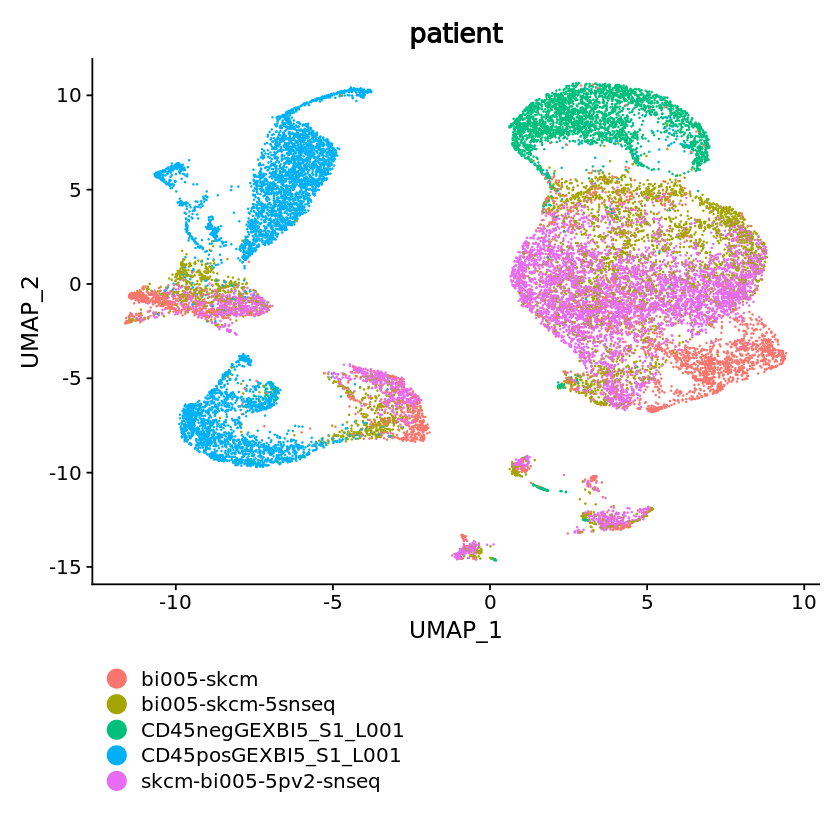

In [15]:
DimPlot(NSCL_merged, group.by = c("patient"), ncol = 1, shuffle=TRUE)+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 6, override.aes = list(size=5)))


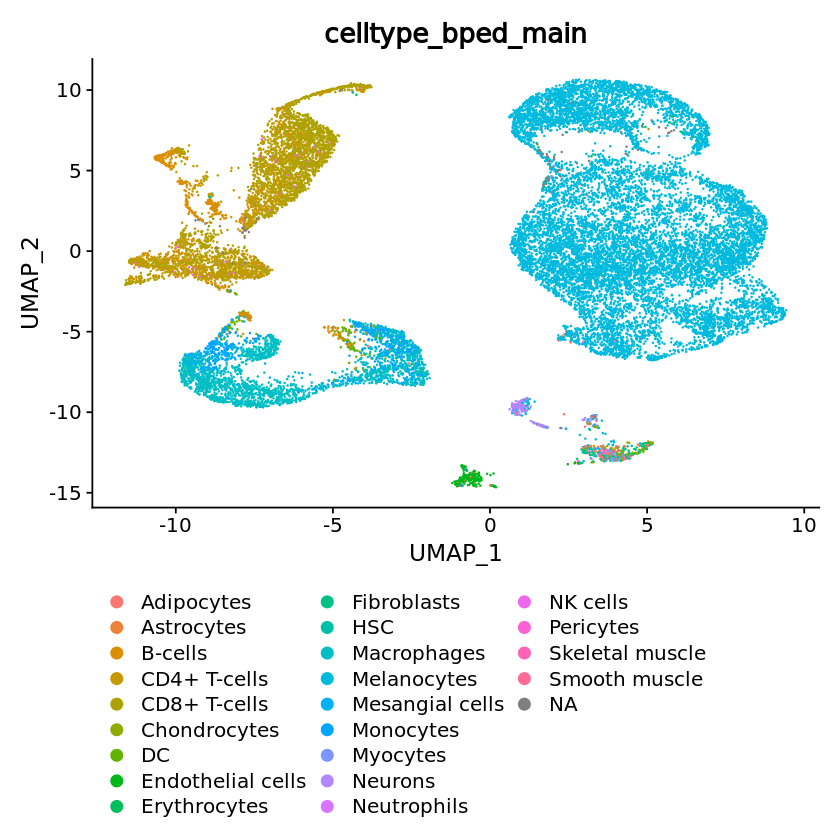

In [16]:
DimPlot(NSCL_merged, group.by = c("celltype_bped_main"), ncol = 1, shuffle=TRUE)+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [17]:
pcs=prcomp(t(as.matrix(NSCL_merged@assays$RNA[c(1:8000)])),rank=20)

In [18]:
#evaluate batch effect using lisi score

umap_coords=pcs$x

labels <- as.data.frame(NSCL_merged@meta.data$orig.ident)
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.182041

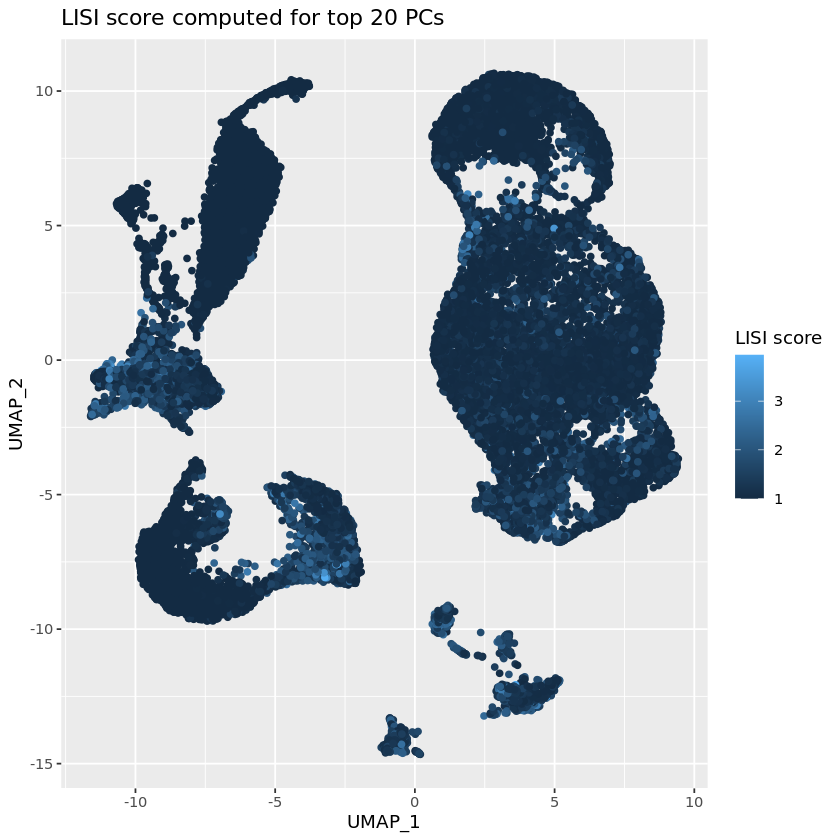

In [19]:
ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") +ggtitle("LISI score computed for top 20 PCs")

In [4]:
NSCL_merged=readRDS("ribas/bi005/bi005_raw_Seurat.rds")

In [15]:
annot=read.csv("ribas/DEGs/bi005_annotations")

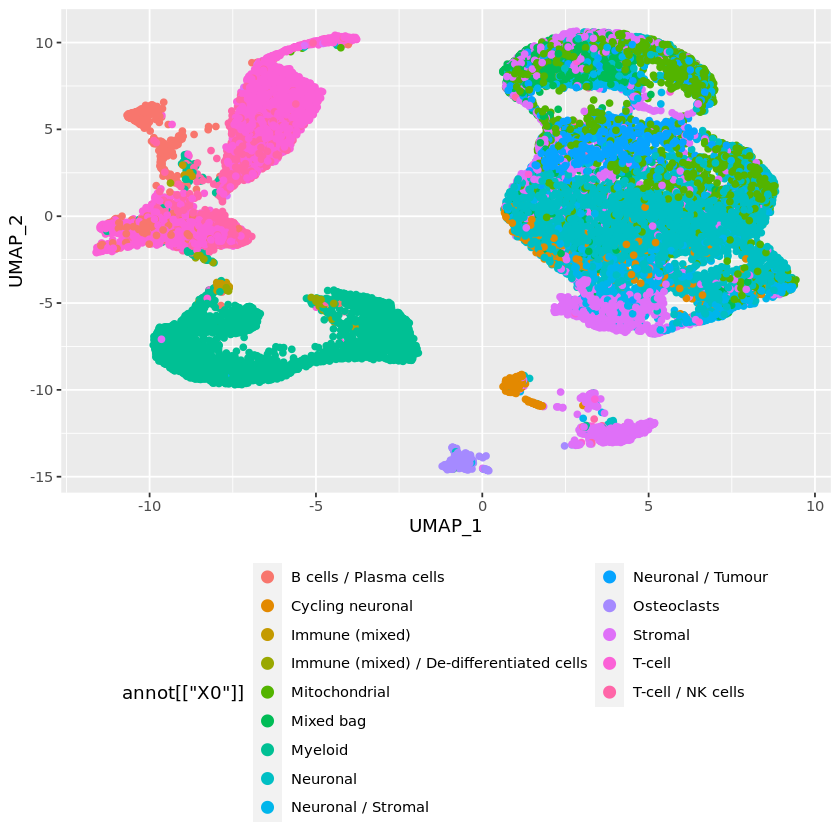

In [28]:
ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=annot[["X0"]])) + 
  geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


### Seurat Integration

In [29]:
NSCL_merged.list <- lapply(X = NSCL_merged.list, FUN = function(x) {
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

In [30]:
features <- SelectIntegrationFeatures(object.list = NSCL_merged.list)

In [31]:
immune.anchors <- FindIntegrationAnchors(object.list = NSCL_merged.list, anchor.features = features)

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 7901 anchors

Filtering anchors

	Retained 5094 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 7539 anchors

Filtering anchors

	Retained 3493 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6764 anchors

Filtering anchors

	Retained 2913 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6547 anchors

Filtering anchors

	Retained 2611 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6280 anchors

Filtering anchors

	Retained 2513 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 9225 anchors

Filtering anchors

	Retained 1535 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 10589 anchors

Filtering anchors

	Retained 4562 a

In [32]:
# this command creates an 'integrated' data assay
immune.combined <- IntegrateData(anchorset = immune.anchors)

Merging dataset 2 into 5

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 1 into 5 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 3 into 4

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 4 3 into 5 2 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [33]:
DefaultAssay(immune.combined) <- "integrated"

# Run the standard workflow for visualization and clustering
immune.combined <- ScaleData(immune.combined, verbose = FALSE)
immune.combined <- RunPCA(immune.combined, npcs = 30, verbose = FALSE)
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:30)
immune.combined <- FindNeighbors(immune.combined, reduction = "pca", dims = 1:30)
immune.combined <- FindClusters(immune.combined, resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
19:35:01 UMAP embedding parameters a = 0.9922 b = 1.112

19:35:01 Read 21094 rows and found 30 numeric columns

19:35:01 Using Annoy for neighbor search, n_neighbors = 30

19:35:01 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:35:03 Writing NN index file to temp file /tmp/RtmpYwnVO3/file2c512aac1c84

19:35:03 Searching Annoy index using 1 thread, search_k = 3000

19:35:08 Annoy recall = 100%

19:35:08 Commencing smooth kNN distance calibration using 1 thread

19:35:09 Initializing fr

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 21094
Number of edges: 795981

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9090
Number of communities: 21
Elapsed time: 2 seconds


In [34]:
immune.combined

An object of class Seurat 
10000 features across 21094 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [41]:
scvi_dense_full<-cbind(immune.combined[["umap"]]@cell.embeddings,annot[["X1"]],immune.combined$patient)
colnames(scvi_dense_full) <- c("X0","X1","annot",'orig.ident')

g<-ggplot(shuf(as.data.frame(scvi_dense_full)), aes(x=as.double(X0), y=as.double(X1),color=annot)) + ggtitle("Cell Type")+xlab("UMAP1")+ylab("UMAP2")+geom_point(size=.3) +theme_classic()+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))
ggsave(g,file="figures/bi005_seuratCCA_cell_type.eps",device="eps")

Saving 6.67 x 6.67 in image



In [42]:
g<-ggplot(shuf(as.data.frame(scvi_dense_full)), aes(x=as.double(X0), y=as.double(X1),color=orig.ident)) + ggtitle("Sample Origin")+xlab("UMAP1")+ylab("UMAP2")+ geom_point(size=.3)+theme_classic() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))
ggsave(g,file="figures/bi005_seuratCCA_origin.eps",device="eps")

Saving 6.67 x 6.67 in image



In [64]:
pcs=prcomp(t(as.matrix(immune.combined$integrated[c(1:2000)])),rank=20)

#evaluate batch effect using lisi score

umap_coords=pcs$x

labels <- as.data.frame(NSCL_merged@meta.data$orig.ident)
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 2.035921

In [65]:
g<-ggplot(as.data.frame(immune.combined[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") +ggtitle("Mean LISI Score: 2.04") + theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank())
ggsave(g,file="figures/bi005_seuratCCA_LISI.eps",device="eps")

Saving 6.67 x 6.67 in image



### STACAS

In [21]:
var.genes.n <- 800
var.genes.integrated.n <- 500

for (i in 1:length(NSCL_merged.list)) {
    NSCL_merged.list[[i]] <- NormalizeData(NSCL_merged.list[[i]], verbose = FALSE)
    
    NSCL_merged.list[[i]] <- FindVariableFeatures(NSCL_merged.list[[i]], selection.method = "vst", 
        nfeatures = var.genes.n*2, verbose = FALSE)
    
    #mito.genes <- grep(pattern = "^mt-", rownames(ref.list[[i]]), value = TRUE)
    #ribo.genes <- grep(pattern = "^Rp[ls]", rownames(ref.list[[i]]), value = TRUE)
    
    #ref.list[[i]]@assays$RNA@var.features <- setdiff(ref.list[[i]]@assays$RNA@var.features, cellCycle.symbol)
    #ref.list[[i]]@assays$RNA@var.features <- setdiff(ref.list[[i]]@assays$RNA@var.features, mito.genes)
    #ref.list[[i]]@assays$RNA@var.features <- setdiff(ref.list[[i]]@assays$RNA@var.features, ribo.genes)
    NSCL_merged.list[[i]]@assays$RNA@var.features <- head( NSCL_merged.list[[i]]@assays$RNA@var.features, var.genes.n)
}

In [22]:
ndim=10
ref.anchors <- FindAnchors.STACAS(NSCL_merged.list, dims=1:ndim, anchor.features=var.genes.integrated.n)

Computing 500 integration features

Preparing PCA embeddings for objects...



 1/5 2/5 3/5 4/5 5/5


Computing within dataset neighborhoods

Finding all pairwise anchors

Finding neighborhoods

Finding anchors

	Found 4485 anchors

Finding neighborhoods

Finding anchors

	Found 1852 anchors

Finding neighborhoods

Finding anchors

	Found 1290 anchors

Finding neighborhoods

Finding anchors

	Found 1526 anchors

Finding neighborhoods

Finding anchors

	Found 1095 anchors

Finding neighborhoods

Finding anchors

	Found 635 anchors

Finding neighborhoods

Finding anchors

	Found 4523 anchors

Finding neighborhoods

Finding anchors

	Found 5258 anchors

Finding neighborhoods

Finding anchors

	Found 1470 anchors

Finding neighborhoods

Finding anchors

	Found 854 anchors



In [23]:
names <- names(NSCL_merged.list)

plots <- PlotAnchors.STACAS(ref.anchors, obj.names=names)

g.cols <- 2
g.rows <- as.integer((length(plots)+2)/g.cols)
g <- do.call("arrangeGrob", c(plots, ncol=g.cols, nrow=g.rows))

Picking joint bandwidth of 0.0185

Picking joint bandwidth of 0.0197

Picking joint bandwidth of 0.0275

Picking joint bandwidth of 0.034

Picking joint bandwidth of 0.0202



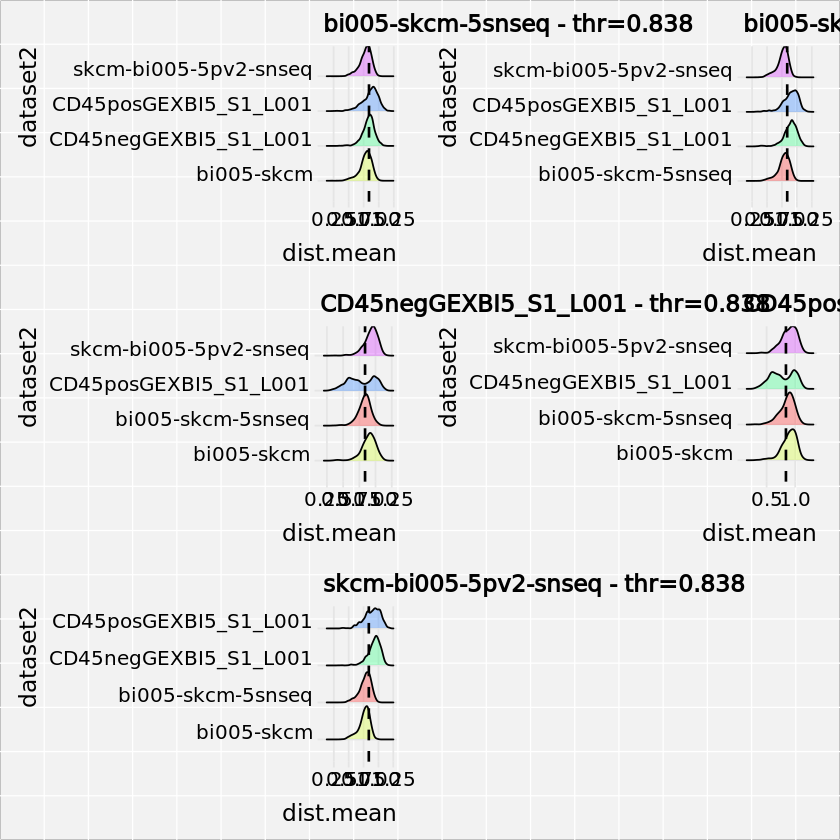

In [24]:
plot(g,combine=FALSE)

In [25]:
ref.anchors.filtered <- FilterAnchors.STACAS(ref.anchors)

Filter anchors using distance threshold t=0.838



In [26]:
#Before
anchor.stats.before <- table(ref.anchors@anchors[,c("dataset1","dataset2")])

#After
anchor.stats.after <- table(ref.anchors.filtered@anchors[,c("dataset1","dataset2")])

rownames(anchor.stats.before) <- names(NSCL_merged.list)
colnames(anchor.stats.before) <- names(NSCL_merged.list)
rownames(anchor.stats.after) <- names(NSCL_merged.list)
colnames(anchor.stats.after) <- names(NSCL_merged.list)
anchor.stats.before

                       dataset2
dataset1                bi005-skcm-5snseq bi005-skcm CD45negGEXBI5_S1_L001
  bi005-skcm-5snseq                     0       4485                  1852
  bi005-skcm                         4485          0                  1290
  CD45negGEXBI5_S1_L001              1852       1290                     0
  CD45posGEXBI5_S1_L001              1526       1095                   635
  skcm-bi005-5pv2-snseq              4523       5258                  1470
                       dataset2
dataset1                CD45posGEXBI5_S1_L001 skcm-bi005-5pv2-snseq
  bi005-skcm-5snseq                      1526                  4523
  bi005-skcm                             1095                  5258
  CD45negGEXBI5_S1_L001                   635                  1470
  CD45posGEXBI5_S1_L001                     0                   854
  skcm-bi005-5pv2-snseq                   854                     0

In [27]:
anchor.stats.after

                       dataset2
dataset1                bi005-skcm-5snseq bi005-skcm CD45negGEXBI5_S1_L001
  bi005-skcm-5snseq                     0       3067                   915
  bi005-skcm                         3067          0                   338
  CD45negGEXBI5_S1_L001               915        338                     0
  CD45posGEXBI5_S1_L001               562        312                   363
  skcm-bi005-5pv2-snseq              3140       4206                   253
                       dataset2
dataset1                CD45posGEXBI5_S1_L001 skcm-bi005-5pv2-snseq
  bi005-skcm-5snseq                       562                  3140
  bi005-skcm                              312                  4206
  CD45negGEXBI5_S1_L001                   363                   253
  CD45posGEXBI5_S1_L001                     0                   284
  skcm-bi005-5pv2-snseq                   284                     0

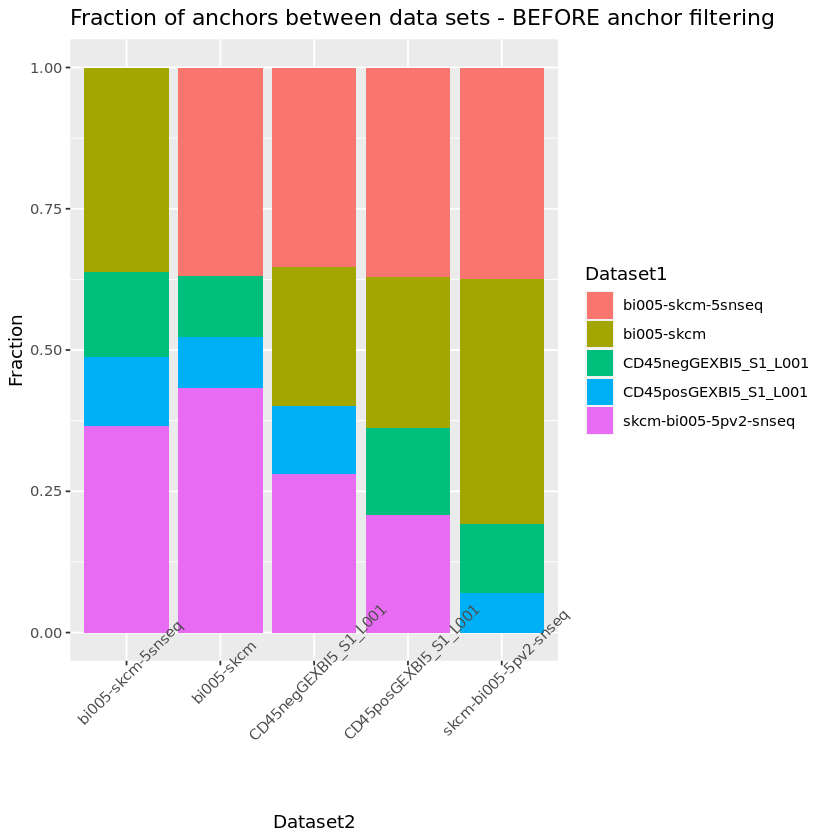

In [28]:
anchor.stats.before.norm <- apply(anchor.stats.before, 1, function(x) {x/sum(x)})
toplot <- melt(anchor.stats.before.norm, varnames=c("Dataset1","Dataset2"), value.name = "Fraction")
ggplot(toplot, aes(fill=Dataset1, y=Fraction, x=Dataset2)) + 
    geom_bar(position="stack", stat="identity") +
  theme(axis.text.x = element_text(angle = 45)) +
    ggtitle("Fraction of anchors between data sets - BEFORE anchor filtering")

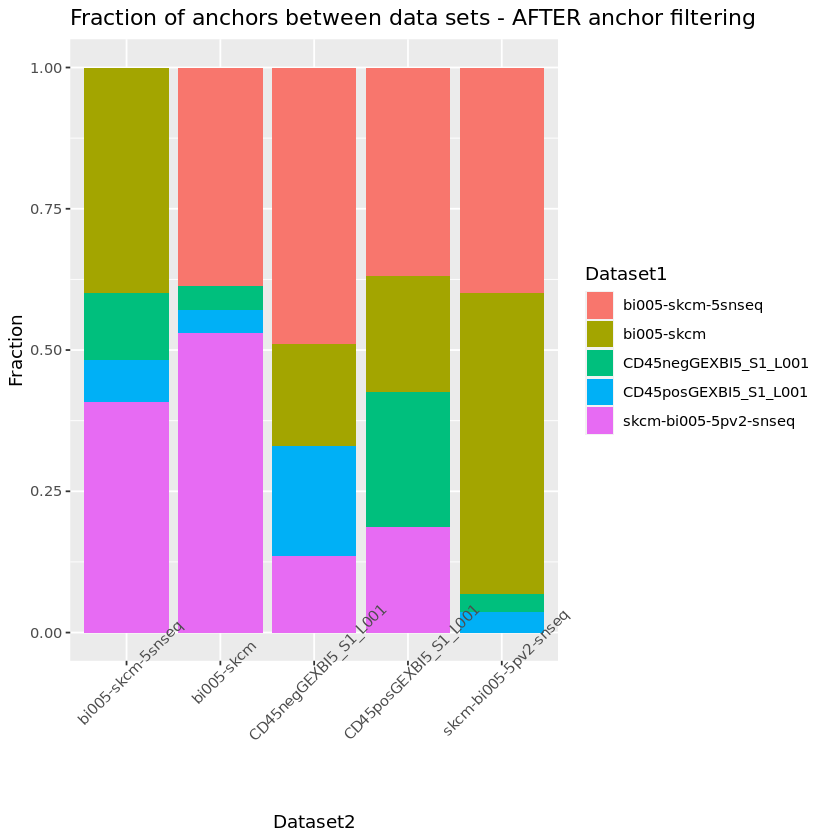

In [29]:
anchor.stats.after.norm <- apply(anchor.stats.after, 1, function(x) {x/sum(x)})
toplot <- melt(anchor.stats.after.norm, varnames=c("Dataset1","Dataset2"), value.name = "Fraction")
ggplot(toplot, aes(fill=Dataset1, y=Fraction, x=Dataset2)) + 
    geom_bar(position="stack", stat="identity") +
  theme(axis.text.x = element_text(angle = 45)) +
    ggtitle("Fraction of anchors between data sets - AFTER anchor filtering")

In [30]:
all.genes <- row.names(NSCL_merged.list[[1]])
for (i in 2:length(NSCL_merged.list)) {
   all.genes <- intersect(all.genes, row.names(NSCL_merged.list[[i]]))
}

mySampleTree <- SampleTree.STACAS(ref.anchors.filtered)
print(mySampleTree)

     [,1] [,2]
[1,]   -2   -5
[2,]    1   -1
[3,]   -3   -4
[4,]    2    3


In [31]:
ref.integrated <- IntegrateData(anchorset=ref.anchors.filtered, dims=1:ndim, features.to.integrate=all.genes,
                                sample.tree=mySampleTree, preserve.order=T)

Merging dataset 5 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 1 into 2 5

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 4 into 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 3 4 into 2 5 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [32]:
ndim=15
length(ref.integrated@assays$integrated@var.features)

ref.integrated <- ScaleData(ref.integrated, verbose = TRUE)
ref.integrated <- RunPCA(ref.integrated, features = ref.integrated@assays$integrated@var.features,
                         ndims.print = 1:5, nfeatures.print = 5)

ndim=10  #how many PCA components to retain

ref.integrated <- RunUMAP(ref.integrated, reduction = "pca", dims = 1:ndim, seed.use=123, n.neighbors = 30, min.dist=0.3)


[1] 500

Centering and scaling data matrix

PC_ 1 
Positive:  TYRP1, DCT, VGF, CENPF, TUBB 
Negative:  SPARCL1, CACNA1C, MAGI1, CDH11, SGIP1 
PC_ 2 
Positive:  RBM47, PLXDC2, SLC8A1, RAB31, SRGN 
Negative:  FN1, TIMP3, TYRP1, DCBLD2, LSAMP 
PC_ 3 
Positive:  SLC24A2, CADM2, SPOCK3, TF, NCAM1 
Negative:  LDB2, SPARCL1, ADGRF5, CALCRL, VWF 
PC_ 4 
Positive:  COL1A2, COL3A1, COL1A1, COL6A3, COL5A1 
Negative:  VWF, STC1, ADGRL4, FLT1, ANO2 
PC_ 5 
Positive:  TNC, S100A13, WARS, TIMP3, DCBLD2 
Negative:  LINC01934, RORA, ZEB1, TOX, TSHZ2 

02:40:54 UMAP embedding parameters a = 0.9922 b = 1.112

02:40:54 Read 21094 rows and found 10 numeric columns

02:40:54 Using Annoy for neighbor search, n_neighbors = 30

02:40:54 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

02:40:56 Writing N

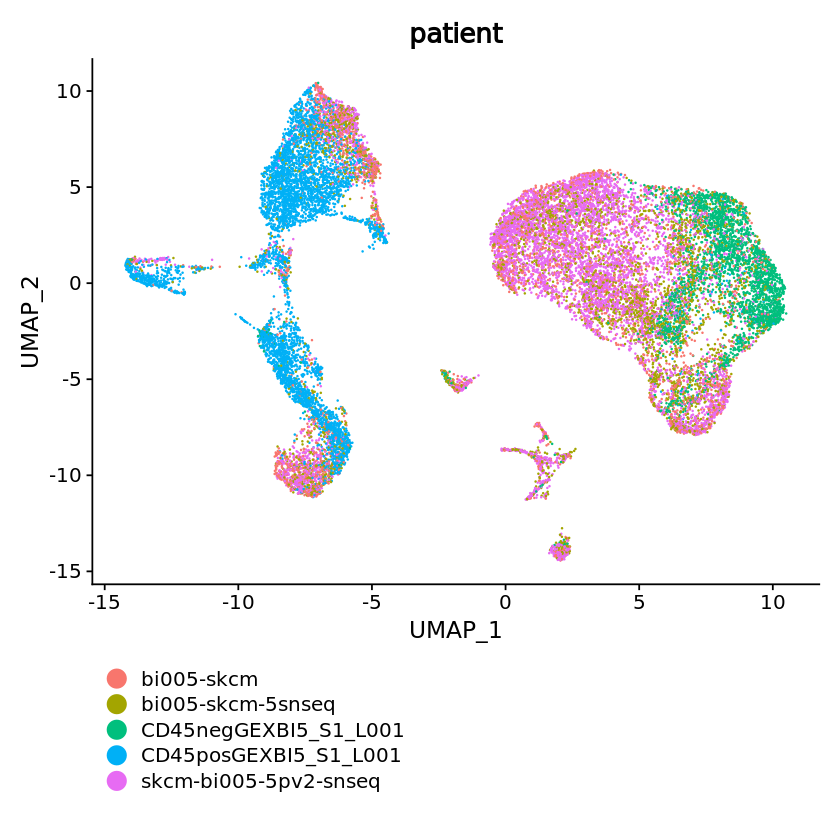

In [33]:
DimPlot(ref.integrated, reduction = "umap", group.by = "patient", shuffle=TRUE) +theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 6, override.aes = list(size=5)))


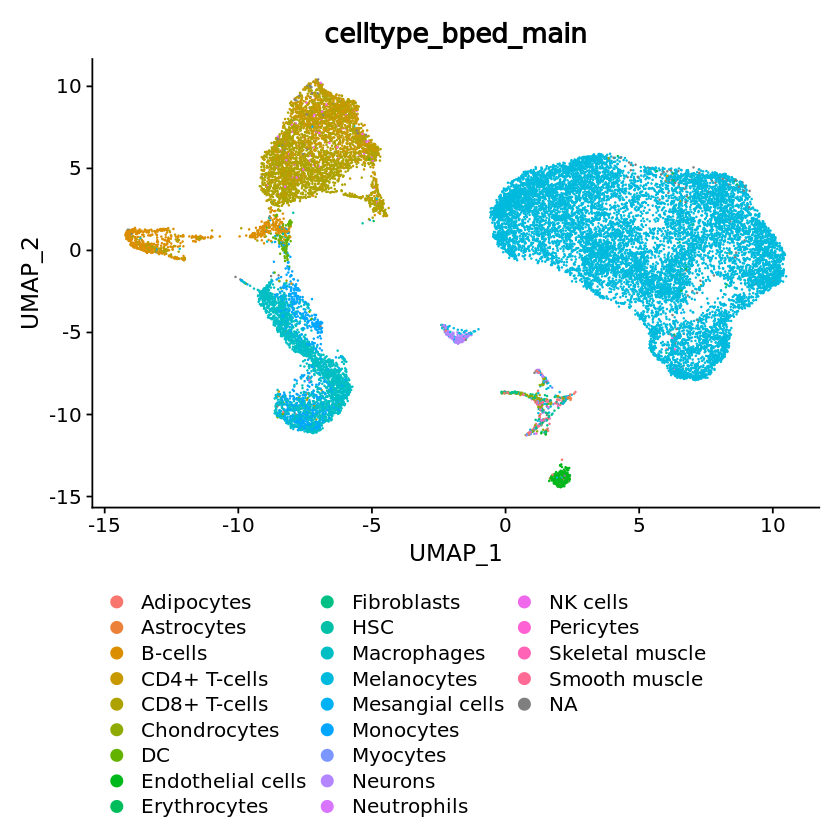

In [34]:
DimPlot(ref.integrated, reduction = "umap", group.by = "celltype_bped_main", shuffle=TRUE) +theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [69]:
pcs=prcomp(t(as.matrix(stacas@assays$integrated[c(1:8000)])),rank=20)

In [70]:
#evaluate batch effect using lisi score

umap_coords=pcs$x

labels <- as.data.frame(stacas@meta.data$orig.ident)
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 2.035921

In [71]:
g<-ggplot(as.data.frame(stacas[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") +ggtitle("Mean LISI Score: 2.04") + theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank())
ggsave(g,file="figures/bi005_stacas_LISI.eps",device="eps")

Saving 6.67 x 6.67 in image



In [7]:
stacas=readRDS("ribas/bi005/bi005_STACAS_merged.rds")

#ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=annot[["X0"]])) + 
#  geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [9]:
for (i in 1:  21094) {
tmp<-str_split(colnames(stacas)[i],pattern="_")
#print(i)
if (tmp[[1]][length(tmp[[1]])]!=annot[["X"]][i]){
    print(tmp[[1]][length(tmp[[1]])])
    print(annot[["X"]][i])
}
}

In [53]:
scvi_dense_full<-cbind(stacas[["umap"]]@cell.embeddings,annot[["X1"]],stacas$patient)
colnames(scvi_dense_full) <- c("X0","X1","annot",'orig.ident')

g<-ggplot(shuf(as.data.frame(scvi_dense_full)), aes(x=as.double(X0), y=as.double(X1),color=annot)) + ggtitle("Cell Type")+xlab("UMAP1")+ylab("UMAP2")+geom_point(size=.3) +theme_classic()+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))
ggsave(g,file="figures/bi005_stacas_celltype.eps",device="eps")

Saving 6.67 x 6.67 in image



In [54]:
g<-ggplot(shuf(as.data.frame(scvi_dense_full)), aes(x=as.double(X0), y=as.double(X1),color=orig.ident)) + ggtitle("Sample Origin")+xlab("UMAP1")+ylab("UMAP2")+geom_point(size=.3) +theme_classic()+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))
ggsave(g,file="figures/bi005_stacas_origin.eps",device="eps")

Saving 6.67 x 6.67 in image



### FastMNN

In [46]:
NSCL_merged <- NormalizeData(NSCL_merged)
NSCL_merged <- FindVariableFeatures(NSCL_merged)

In [47]:
NSCL_merged <- RunFastMNN(object.list = SplitObject(NSCL_merged,split.by='orig.ident'),features=rownames(NSCL_merged))

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from mnn.reconstructed_ to mnnreconstructed_”


In [48]:
NSCL_merged <- RunUMAP(NSCL_merged, reduction = "mnn", dims = 1:30)

03:03:23 UMAP embedding parameters a = 0.9922 b = 1.112

03:03:23 Read 21094 rows and found 30 numeric columns

03:03:23 Using Annoy for neighbor search, n_neighbors = 30

03:03:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

03:03:26 Writing NN index file to temp file /tmp/RtmpAQe2ck/file1f1b68da02ad

03:03:26 Searching Annoy index using 1 thread, search_k = 3000

03:03:31 Annoy recall = 100%

03:03:32 Commencing smooth kNN distance calibration using 1 thread

03:03:34 Initializing from normalized Laplacian + noise

03:03:35 Commencing optimization for 200 epochs, with 889634 positive edges

03:03:44 Optimization finished



In [49]:
NSCL_merged <- FindNeighbors(NSCL_merged, reduction = "mnn", dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [50]:
NSCL_merged <- FindClusters(NSCL_merged)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 21094
Number of edges: 737622

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9133
Number of communities: 29
Elapsed time: 2 seconds


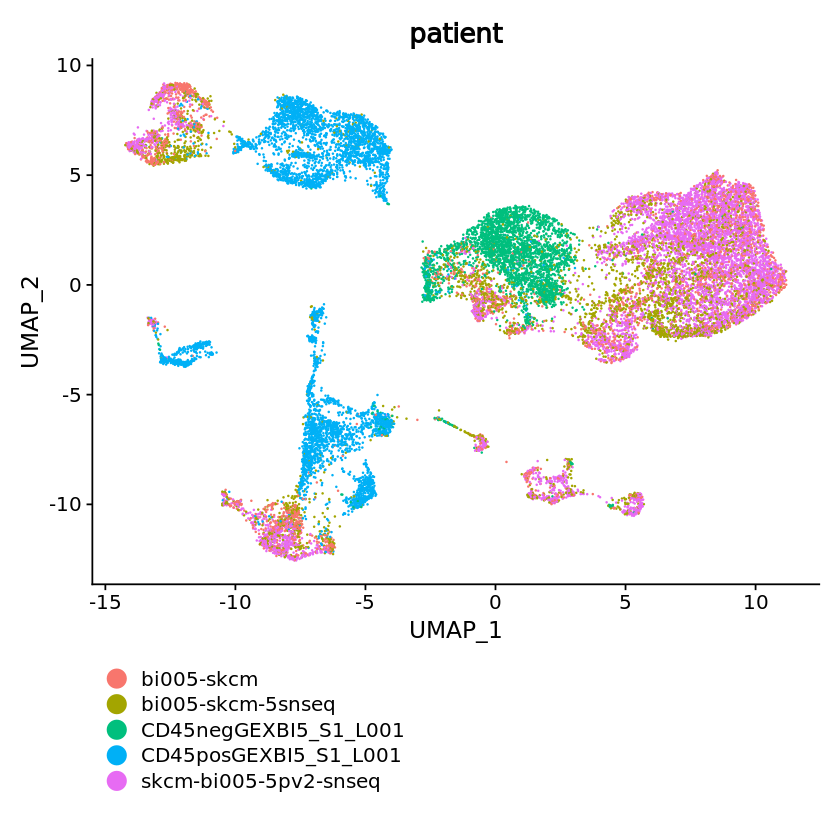

In [51]:
DimPlot(NSCL_merged, group.by = c("patient"), ncol = 1, shuffle=TRUE)+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 6, override.aes = list(size=5)))



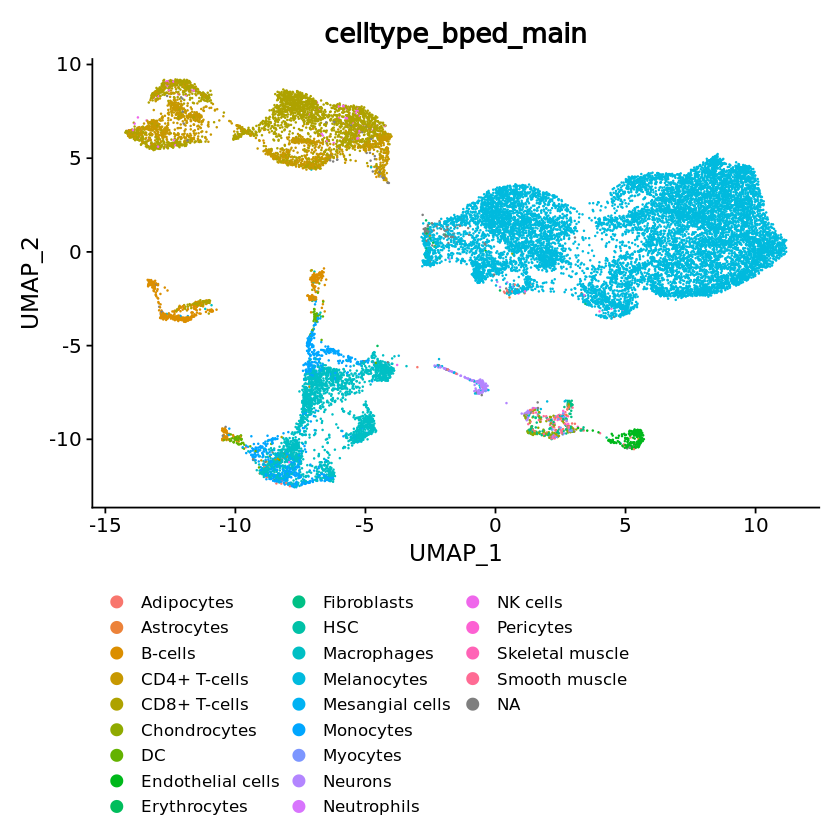

In [52]:
DimPlot(NSCL_merged, group.by = c("celltype_bped_main"), ncol = 1, shuffle=TRUE)+theme(legend.text=element_text(size=10),legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))

In [54]:
pcs=prcomp(t(as.matrix(NSCL_merged@assays$mnn.reconstructed[c(1:8000)])),rank=20)

In [55]:
#evaluate batch effect using lisi score

umap_coords=pcs$x

labels <- as.data.frame(NSCL_merged@meta.data$orig.ident)
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.57344

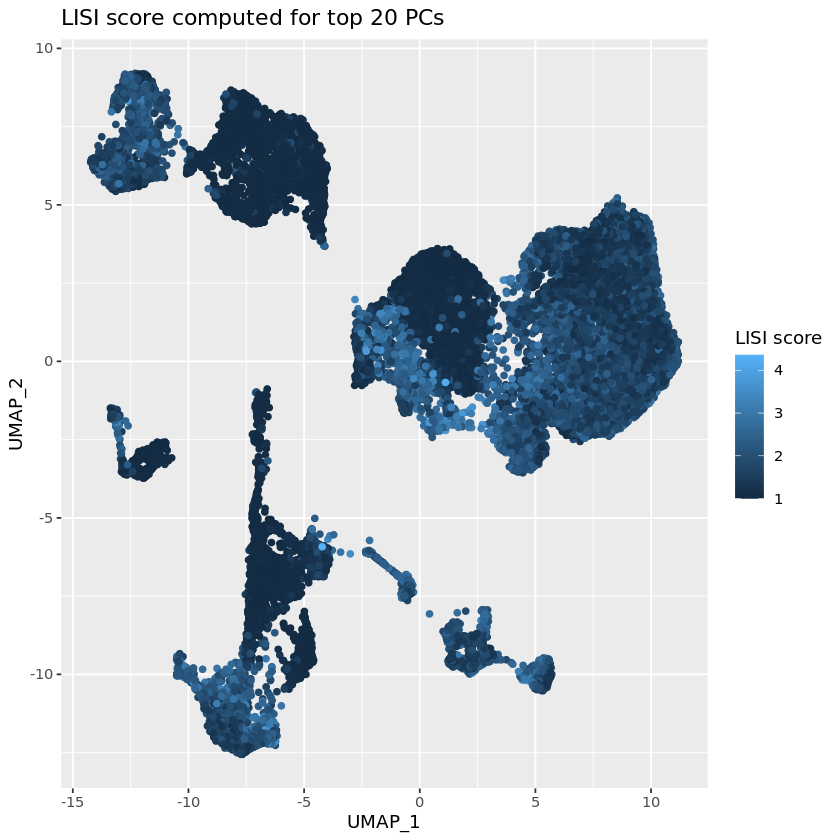

In [56]:
ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") +ggtitle("LISI score computed for top 20 PCs")

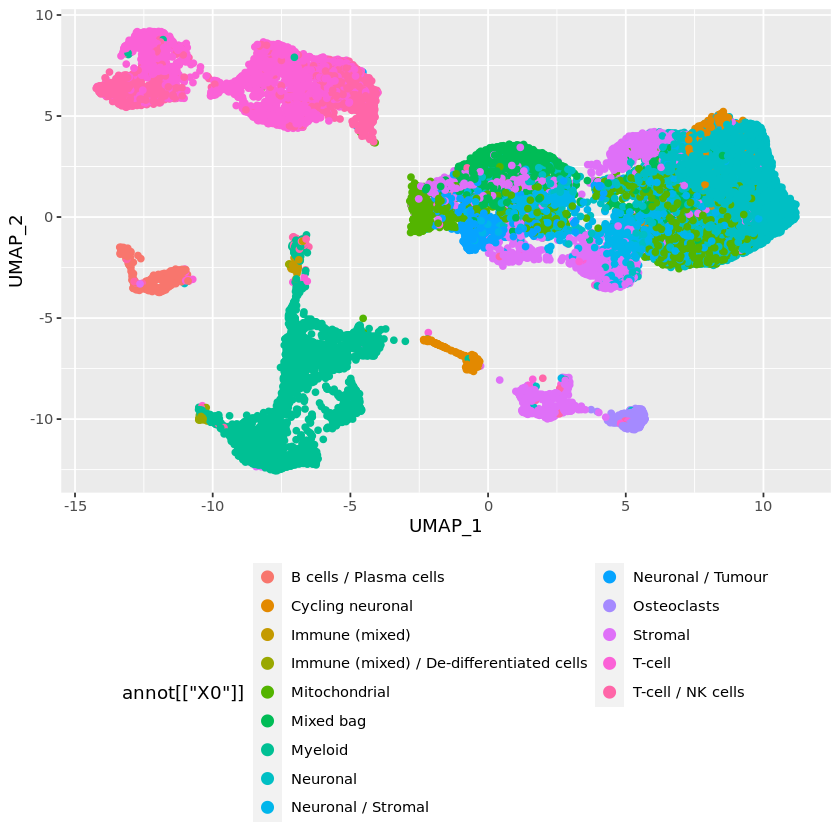

In [30]:
NSCL_merged=readRDS("ribas/bi005/bi005_fastMNN.rds")

ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=annot[["X0"]])) + 
  geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


### LISI for SCVI and Scanorama

In [2]:
scvi_latent <- read.csv("ribas/bi005/bi005_scvi_latent_components.csv")

In [31]:
scvi_latent_umap <- read.csv("ribas/bi005/bi005_scvi_latent_umap.csv")

In [4]:
scvi_cells <- read.csv("ribas/bi005/bi005_orig.ident.csv")

In [5]:
scvi_dense <- read.csv("ribas/bi005/bi005_scvi_dense_pcs.csv")

In [32]:
scvi_dense_umap <- read.csv("ribas/bi005/bi005_scvi_dense_umap.csv")

In [11]:
umap_coords=scvi_latent[c("X0","X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19","X20","X21","X22","X23","X24","X25","X26","X27","X28","X29")]
labels <- scvi_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.764972

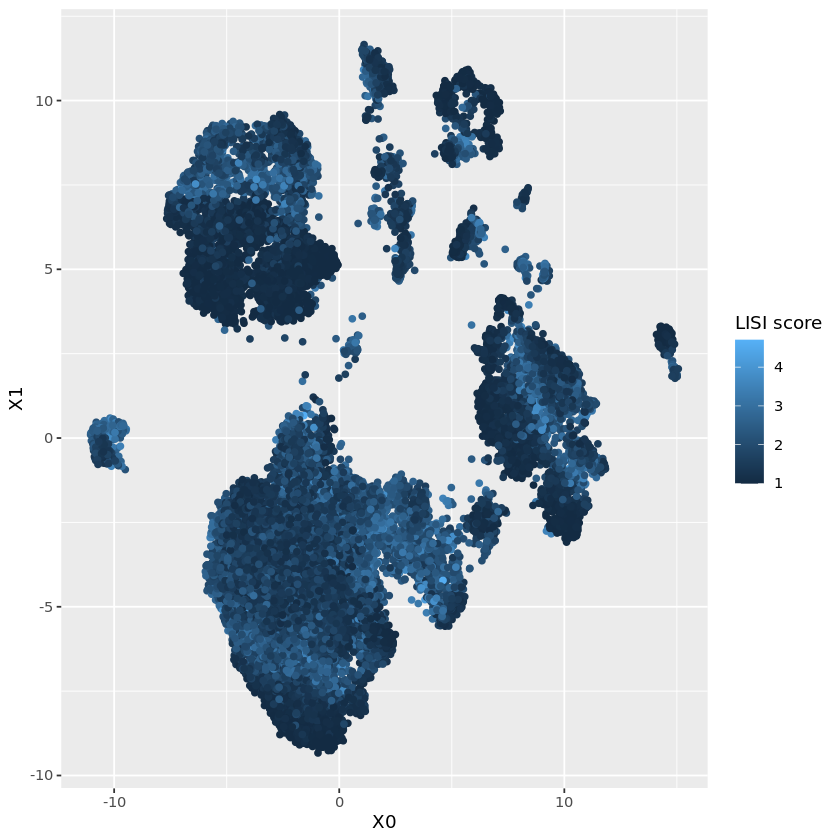

In [12]:
ggplot(scvi_latent_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 


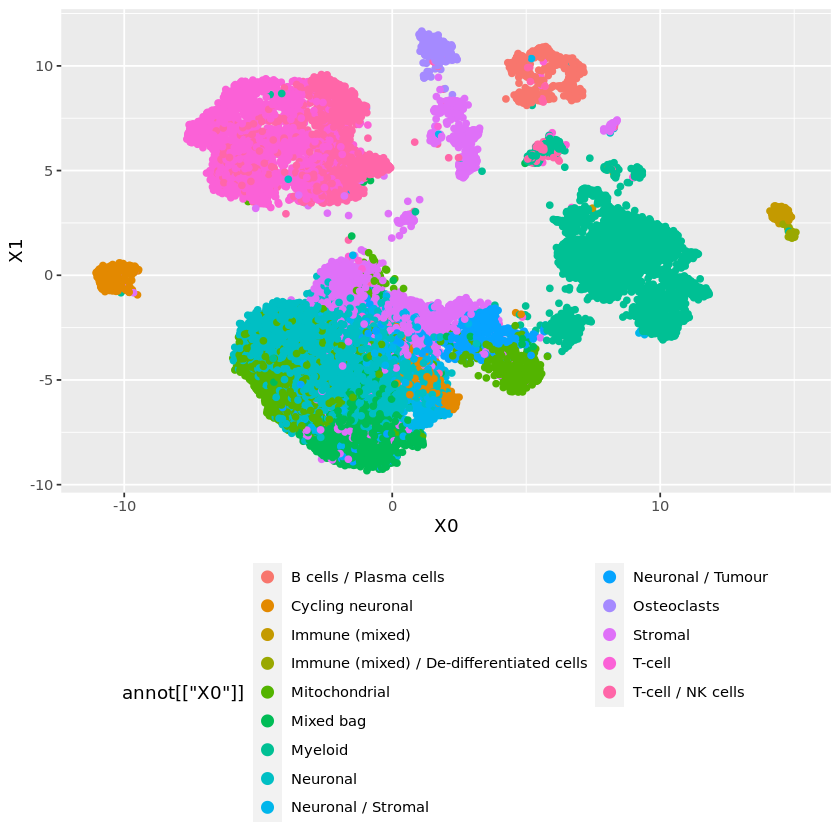

In [34]:
ggplot(scvi_latent_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [13]:
umap_coords=scvi_dense[c("X0","X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19")]

labels <- scvi_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.922009

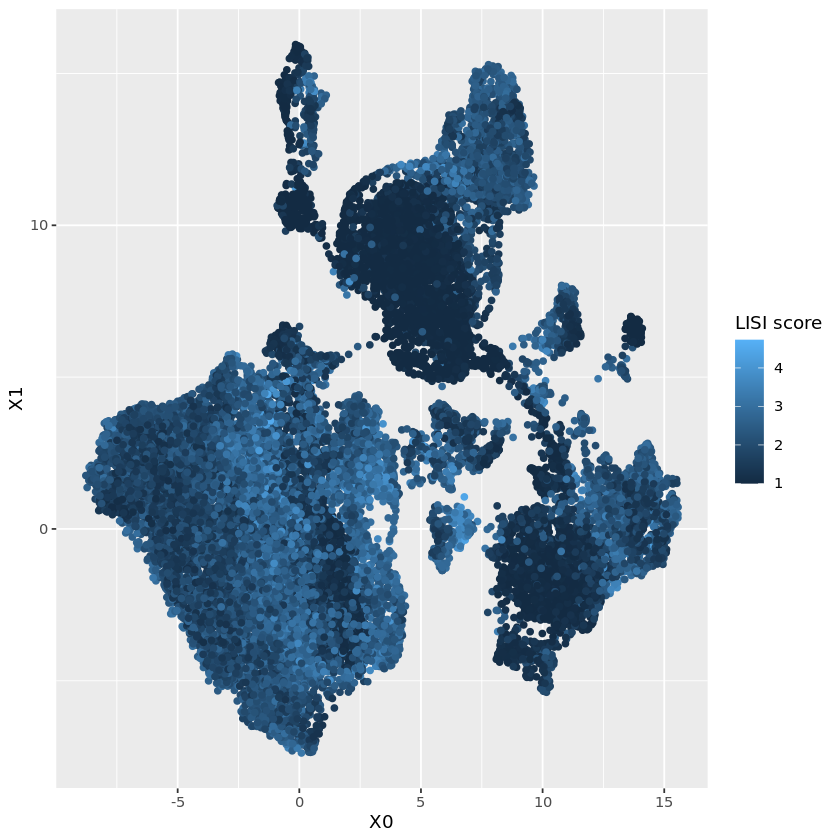

In [14]:
ggplot(scvi_dense_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 


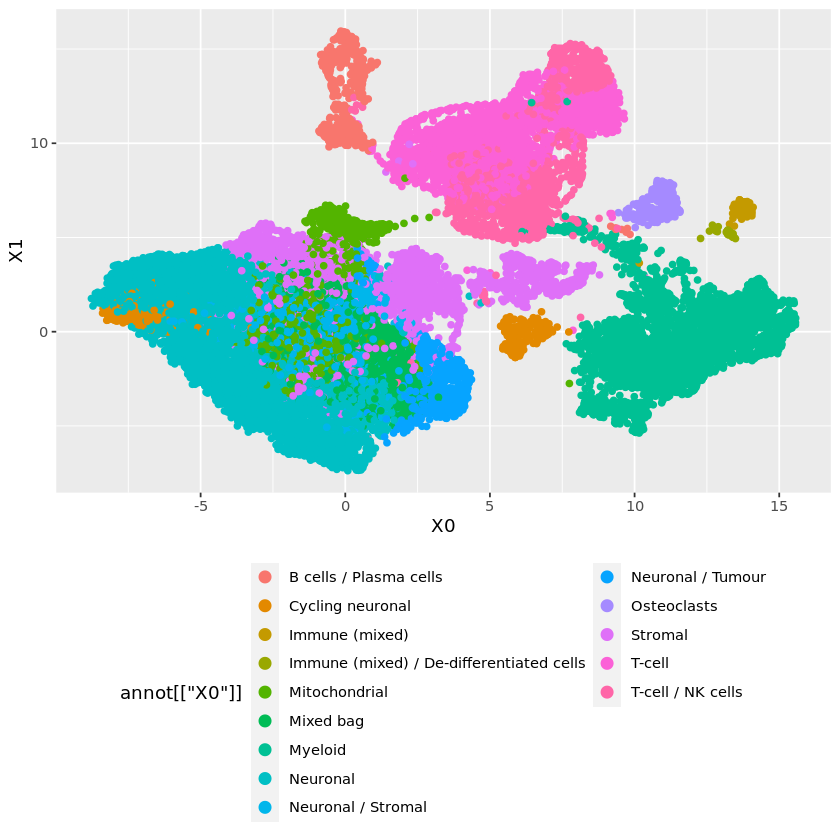

In [35]:
ggplot(scvi_dense_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [15]:
scano_cells <- read.csv("ribas/bi005/bi005_orig.ident.csv")
scano_latent <- read.csv("ribas/bi005/bi005_scanorama_latent_components.csv")
scano_latent_umap <- read.csv("ribas/bi005/bi005_scanorama_latent_umap.csv")

tmp <- c()
for (i in 1:99)
    {
    tmp <- append(tmp, paste("X",toString(i),sep=""))
}

umap_coords=scano_latent[tmp]

labels <- scano_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.604427

In [36]:
scano_latent_umap <- read.csv("ribas/bi005/bi005_scanorama_latent_umap.csv")


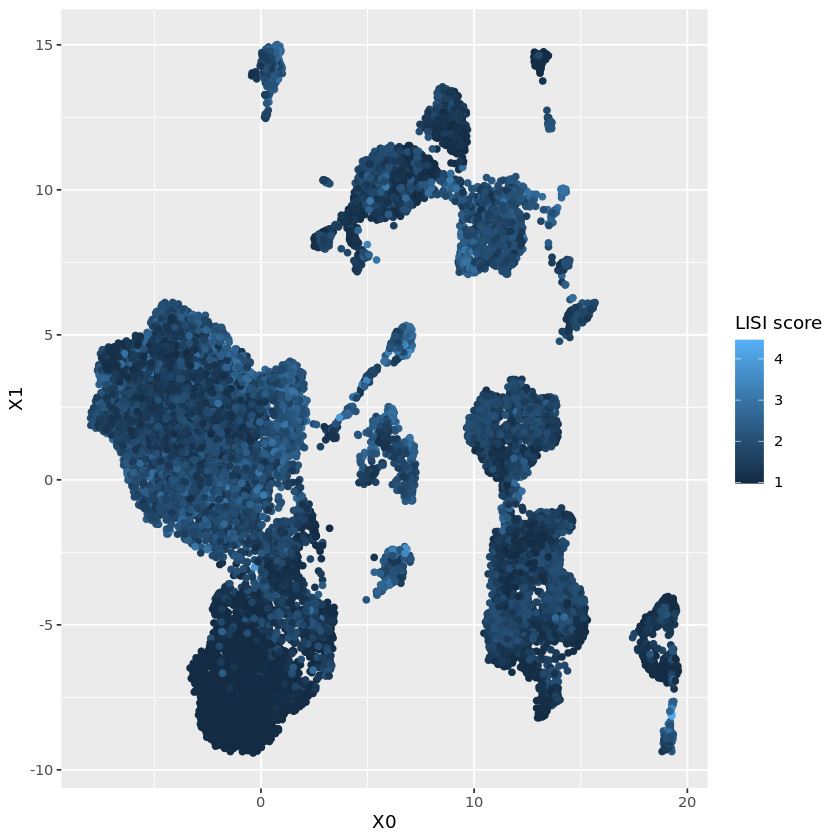

In [16]:
ggplot(scano_latent_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 

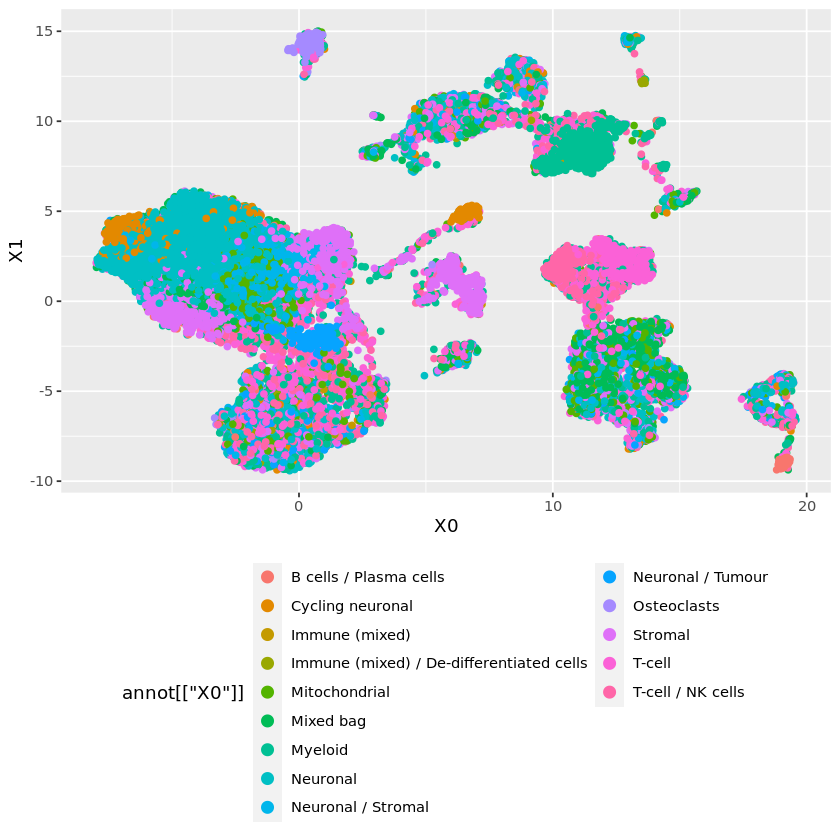

In [37]:
ggplot(scano_latent_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [38]:
scano_dense <- read.csv("ribas/bi005/bi005_scanorama_pcs.csv")
scano_dense_umap <- read.csv("ribas/bi005/bi005_scanorama_dense_umap.csv")

tmp <- c()
for (i in 1:19)
    {
    tmp <- append(tmp, paste("X",toString(i),sep=""))
}

In [18]:
umap_coords=scano_dense[tmp]

labels <- scano_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.587259

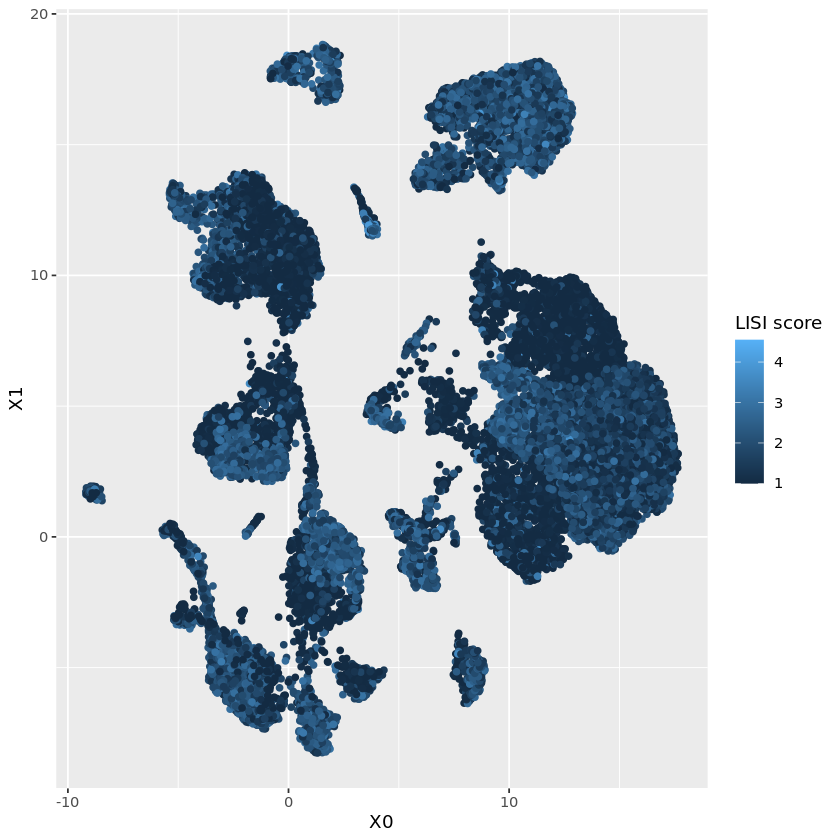

In [19]:
ggplot(scano_dense_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 

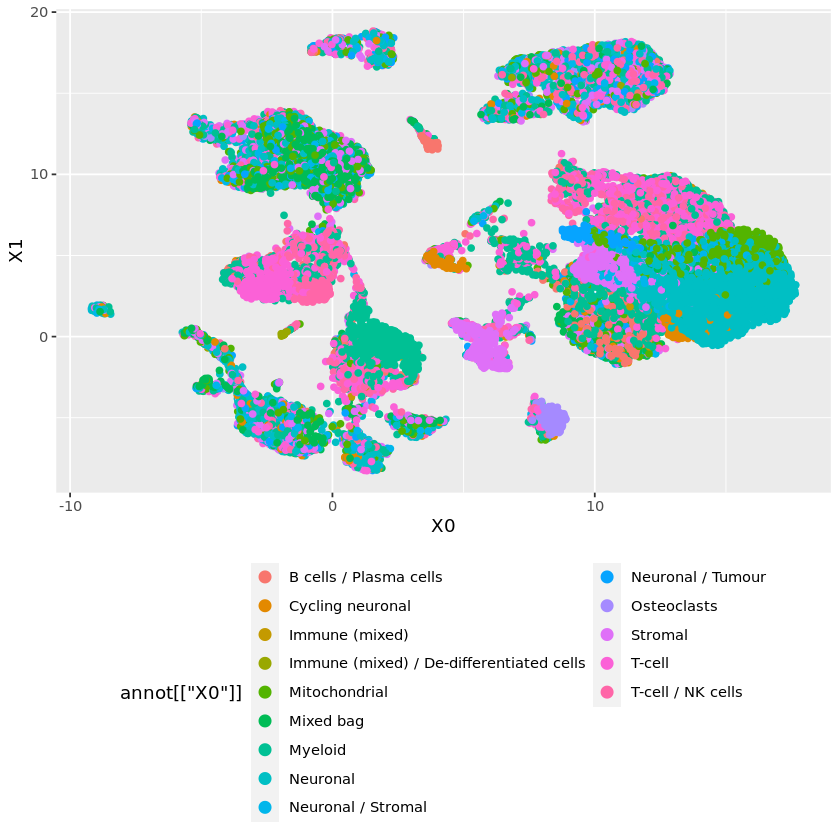

In [39]:
ggplot(scano_dense_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [20]:
raw <- read.csv("ribas/bi005/bi005_merged_NO_BATCH_pcs.csv")

In [40]:
raw_umap <- read.csv("ribas/bi005/bi005_raw_umap.csv")

In [22]:
umap_coords=raw[c("X0","X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19")]

labels <- scano_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.177429

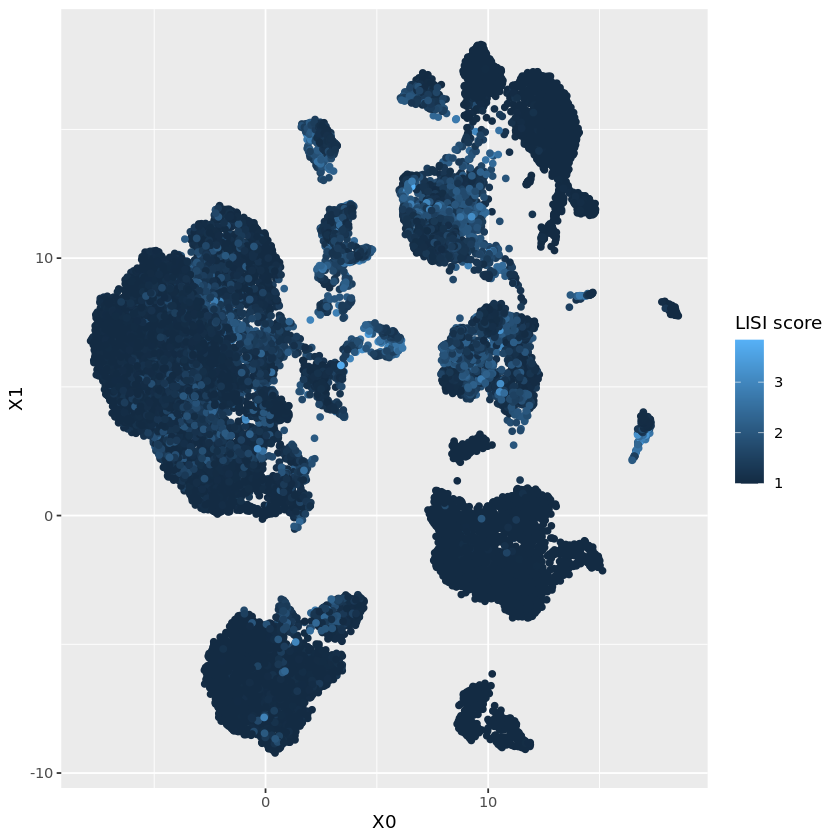

In [23]:
ggplot(raw_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 


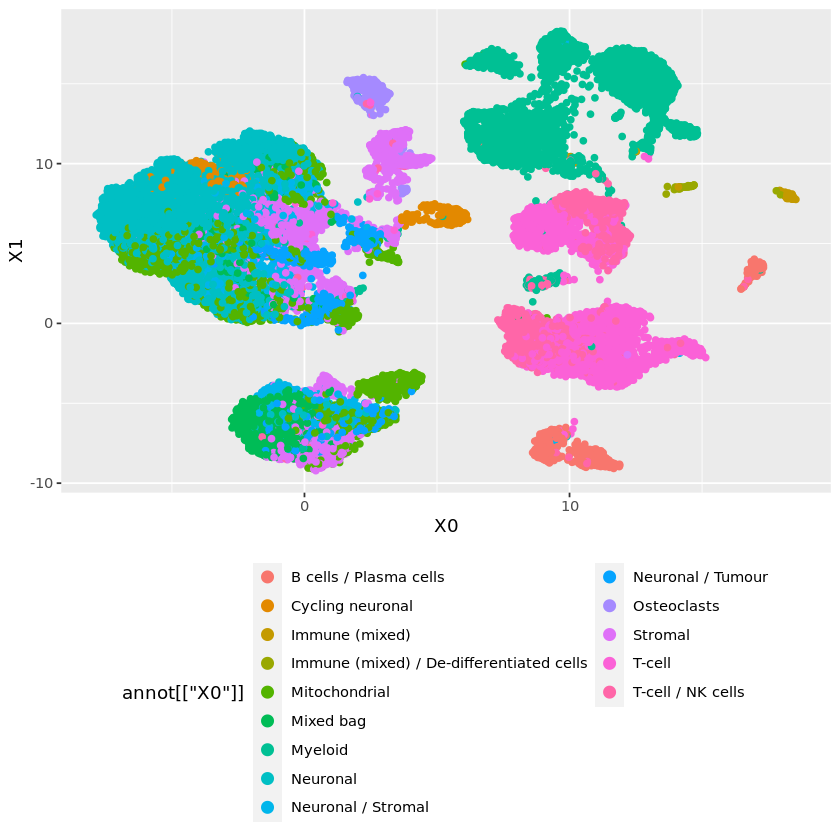

In [41]:
ggplot(raw_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


### kBet

In [21]:
library(kBET)

In [ ]:
batch.estimate <- kBET(as.matrix(NSCL_merged@assays$RNA@data),NSCL_merged@meta.data$patient)

In [22]:
NSCL_merged_split <- SplitObject(NSCL_merged,split.by='orig.ident')

In [39]:
sample <- as.data.frame(NSCL_merged_split[1])
batch <- names(sample)
subset_size <- 0.1 #subsample to 10% of the data
subset_id <- sample.int(n = length(batch), size = floor(subset_size * length(batch)), replace=FALSE)

In [37]:
nrow(sample)

NULL

In [41]:
sample <- as.matrix(NSCL_merged_split[1])